#**Titanic.csv**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
print("Dataset shape:", df.shape)

print("\nData Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())


Dataset shape: (891, 12)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Descriptive Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642

In [ ]:
missing_counts = df.isnull().sum()
missing_percentage = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_counts, 'Percentage (%)': missing_percentage})
print("\nMissing Values:")
print(missing_df[missing_df['Missing Values'] > 0])  # Show only columns with missing data



Missing Values:
          Missing Values  Percentage (%)
Age                  177       19.865320
Cabin                687       77.104377
Embarked               2        0.224467


Handling Missing Values

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
df['Cabin'] = df['Cabin'].fillna('U')  # 'U' = Unknown
df['Deck'] = df['Cabin'].apply(lambda x: x[0])  # Extract deck letter from Cabin
df['Deck'] = df['Deck'].astype('category').cat.codes

In [ ]:
df.drop(columns=['Cabin'], inplace=True)

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0]) # Only 2  data missing here

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
df = pd.get_dummies(df, columns=['Embarked'], prefix='Emb')

In [ ]:
scaler = StandardScaler()
df[['Fare', 'Age']] = scaler.fit_transform(df[['Fare', 'Age']])

Feature Engineering

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [ ]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [ ]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
df.drop(columns=['Name', 'Ticket'], inplace=True)

Here we already have there titles most probably there job from there name, name isn't neccessary

In [ ]:
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=False)

In [ ]:
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=False)

In [ ]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Deck,Emb_C,Emb_Q,Emb_S,FamilySize,IsAlone,Title,AgeBin,FareBin
0,1,0,3,0,-0.565736,1,0,-0.502445,8,False,False,True,2,0,Mr,NaN,0
1,2,1,1,1,0.663861,1,0,0.786845,2,True,False,False,2,0,Mrs,0.0,3
2,3,1,3,1,-0.258337,0,0,-0.488854,8,False,False,True,1,1,Miss,NaN,1
3,4,1,1,1,0.433312,1,0,0.420730,2,False,False,True,2,0,Mrs,0.0,3
4,5,0,3,0,0.433312,0,0,-0.486337,8,False,False,True,1,1,Mr,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,-0.181487,0,0,-0.386671,8,False,False,True,1,1,Rev,NaN,1
887,888,1,1,1,-0.796286,0,0,-0.044381,1,False,False,True,1,1,Miss,NaN,2
888,889,0,3,1,-0.104637,1,2,-0.176263,8,False,False,True,4,0,Miss,NaN,2
889,890,1,1,0,-0.258337,0,0,-0.044381,2,True,False,False,1,1,Mr,NaN,2


In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

#**HOUSING.csv**

In [ ]:
df = pd.read_csv('Housing.csv')

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
print("Dataset shape:", df.shape)

print("\nData Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

Dataset shape: (545, 13)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

Descriptive Statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02

In [ ]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [ ]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

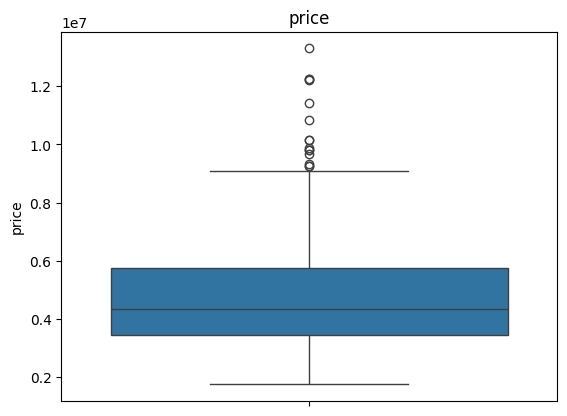

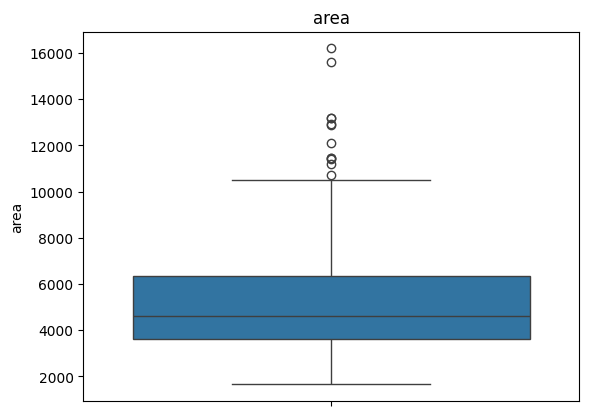

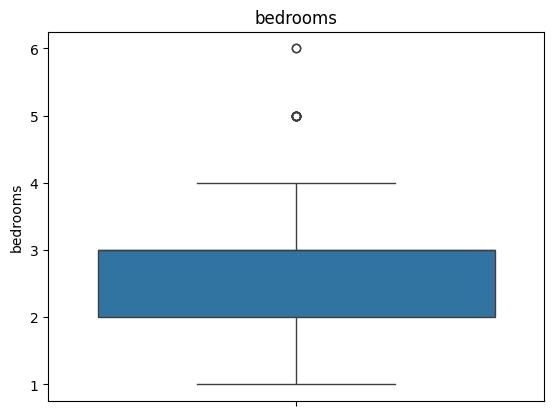

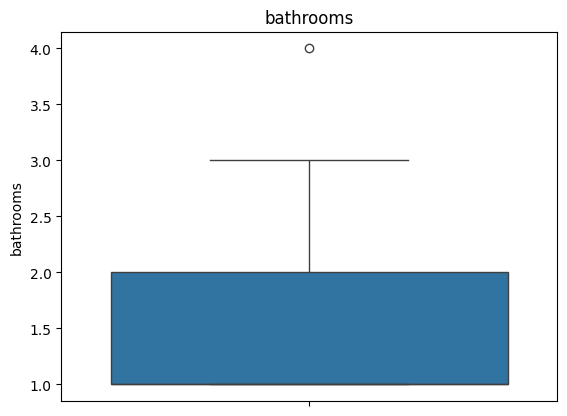

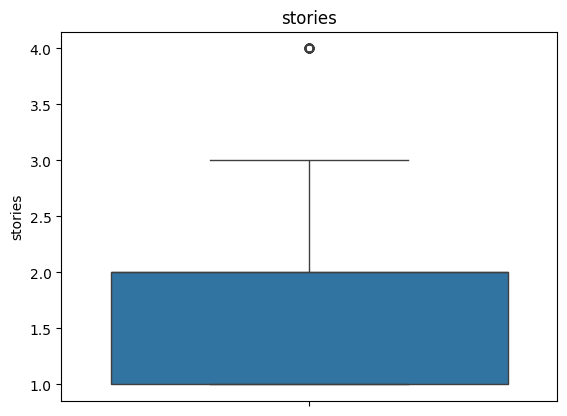

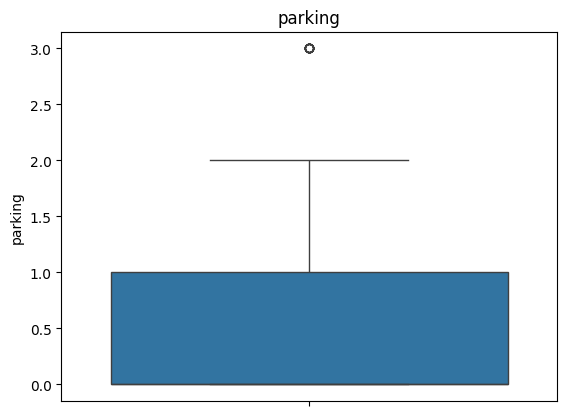

In [ ]:
for col in ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [ ]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

for col in ['price', 'area']:
    df = remove_outliers_iqr(df, col)


In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,False,False


In [ ]:
df['facility_count'] = df[['guestroom', 'basement', 'hotwaterheating', 'airconditioning']].sum(axis=1)


In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,facility_count
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,False,True,3
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,False,False,1
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,False,False,2
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,True,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,True,False,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,True,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,False,False,0


In [ ]:
scale_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

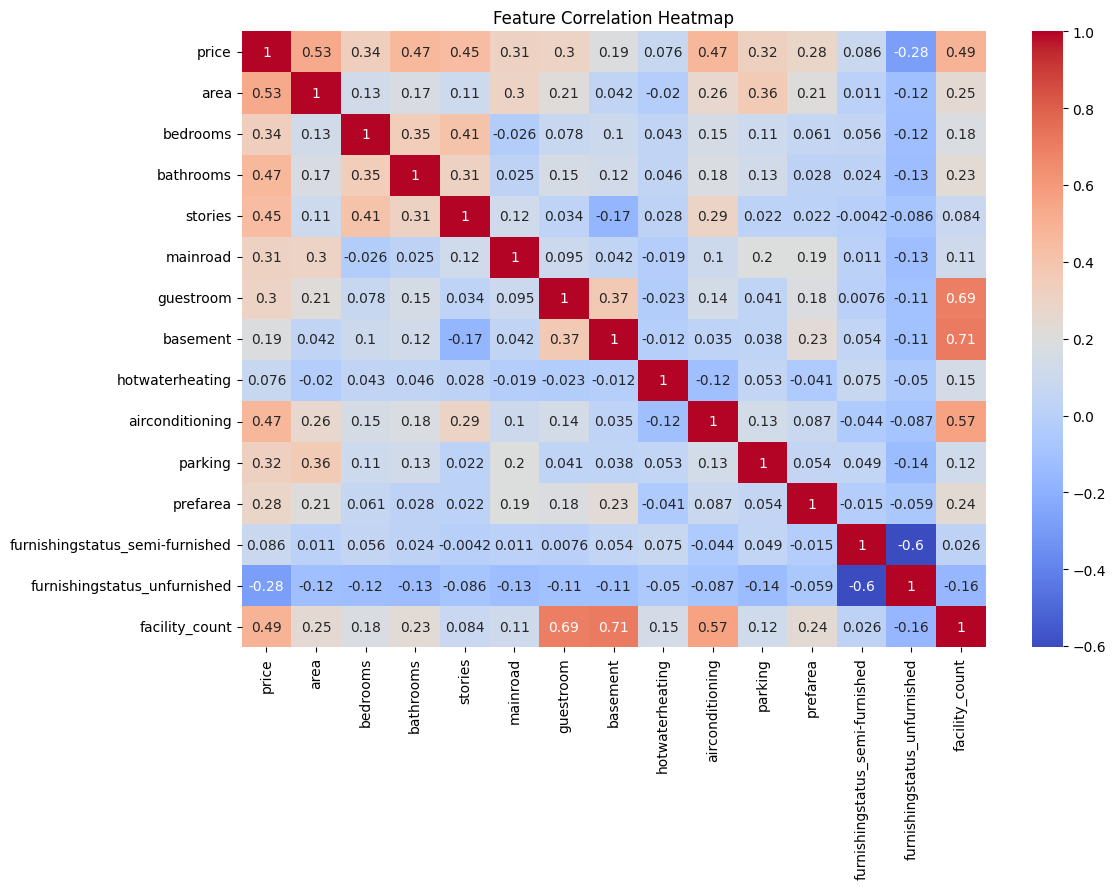

In [ ]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
print("Dataset shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDescriptive Statistics:\n", df.describe())

Dataset shape: (150, 5)

Data Types:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Descriptive Statistics:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
print("\nClass distribution:\n", df['species'].value_counts())


Class distribution:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


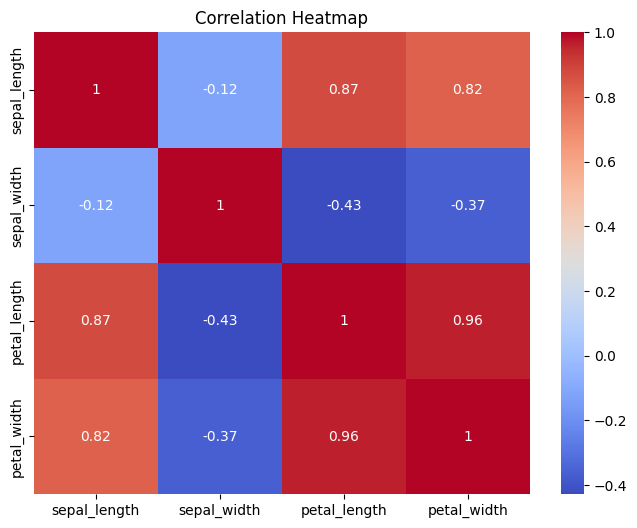

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns='species').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

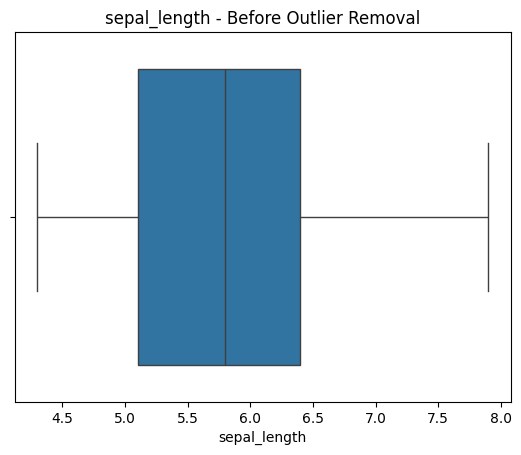

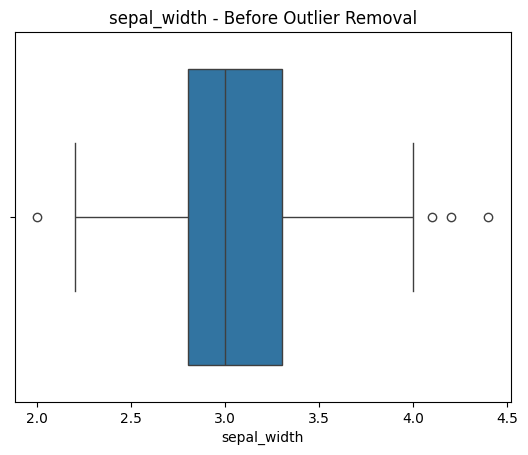

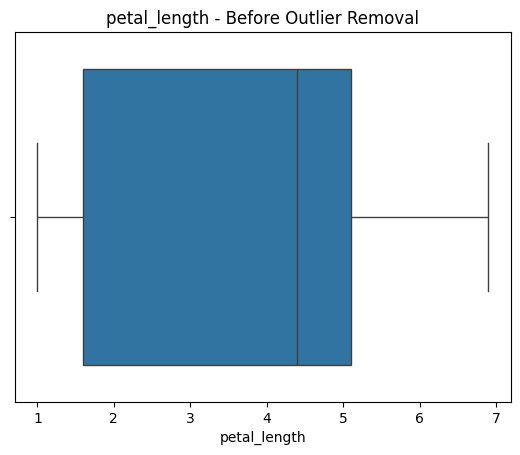

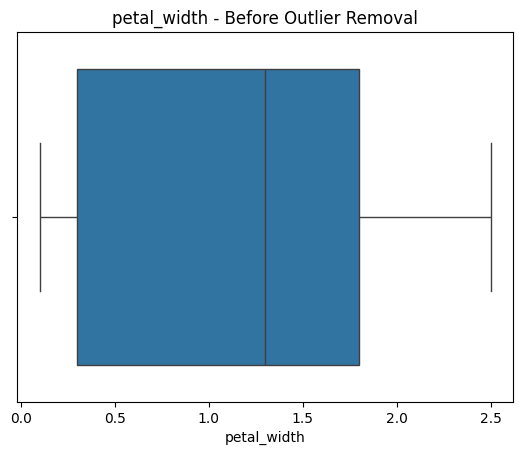

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Before Outlier Removal")
    plt.show()
    df = remove_outliers_iqr(df, col)

In [ ]:
df.shape

(146, 5)

In [ ]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
df['species'] = df['species'].astype('category').cat.codes


In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.910515,1.159151,-1.373764,-1.348525,0
1,-1.151122,-0.101922,-1.373764,-1.348525,0
2,-1.391729,0.402507,-1.430841,-1.348525,0
3,-1.512032,0.150292,-1.316687,-1.348525,0
4,-1.030819,1.411365,-1.373764,-1.348525,0
...,...,...,...,...,...
145,1.014339,-0.101922,0.795172,1.426359,2
146,0.533125,-1.362995,0.681018,0.897810,2
147,0.773732,-0.101922,0.795172,1.029947,2
148,0.412822,0.906936,0.909327,1.426359,2


In [ ]:
X = df.drop(columns='species')
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (116, 4)
Testing Set Shape: (30, 4)


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

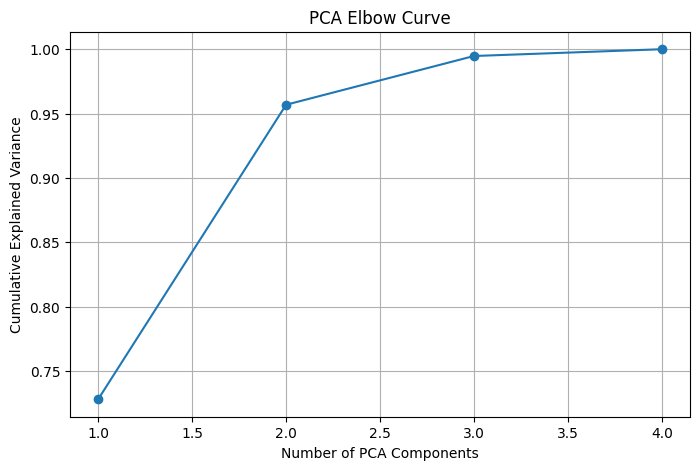

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Elbow Curve')
plt.grid(True)
plt.show()

2 components make up 96% whi

In [ ]:
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Component {i+1}: {var:.4f}")

Component 1: 0.7281
Component 2: 0.2288
Component 3: 0.0379
Component 4: 0.0053
